In [1]:
! wget https://www.dropbox.com/s/05wt50q4vn0kif3/Churn_Modelling.csv?dl=0

--2020-12-27 18:20:44--  https://www.dropbox.com/s/05wt50q4vn0kif3/Churn_Modelling.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/05wt50q4vn0kif3/Churn_Modelling.csv [following]
--2020-12-27 18:20:45--  https://www.dropbox.com/s/raw/05wt50q4vn0kif3/Churn_Modelling.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd4b04badf3bd10f6230ac27268.dl.dropboxusercontent.com/cd/0/inline/BF4jiICnwJHKcwXU3gbqnrXzNDuViIlYjkS1-QCXhvgXF4t3XoFF8L1t8G55aEKqIDdB0SoylIiAWLp85omjDMh5mD7-vhQcUFRZAINIATEaFauclOKGwTwPVJFA-k8QVNE/file# [following]
--2020-12-27 18:20:45--  https://ucd4b04badf3bd10f6230ac27268.dl.dropboxusercontent.com/cd/0/inline/BF4jiICnwJHKcwXU3gbqnrXzNDuViIlYjkS1-QCXhvgXF4t3XoFF8L1t8G55aEKqIDdB0SoylIiAWLp85omjD

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/content/Churn_Modelling.csv?dl=0")
# Classification problem 

In [4]:
#target ---> exited
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
l1 = [ 'RowNumber', 'CustomerId', 'Surname','Gender','Tenure','IsActiveMember']
df.drop(l1,axis = 1, inplace = True)

In [8]:
df.head()

,CreditScore,Geography,Age,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,France,42,0.00,1,1,101348.88,1
1,608,Spain,41,83807.86,1,0,112542.58,0
2,502,France,42,159660.80,3,1,113931.57,1
3,699,France,39,0.00,2,0,93826.63,0
4,850,Spain,43,125510.82,1,1,79084.10,0


In [9]:
df.nunique()

CreditScore         460
Geography             3
Age                  70
Balance            6382
NumOfProducts         4
HasCrCard             2
EstimatedSalary    9999
Exited                2
dtype: int64

In [10]:
df.isnull().sum() # 0 null values

CreditScore        0
Geography          0
Age                0
Balance            0
NumOfProducts      0
HasCrCard          0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
def graph(s):
  sur= df[df['Exited']==1][s].value_counts()
  passed = df[df['Exited']==0][s].value_counts()

  df_t=pd.DataFrame([sur,passed])
  df_t.plot(kind = 'bar')# ---> for graph
  #print(df.head())

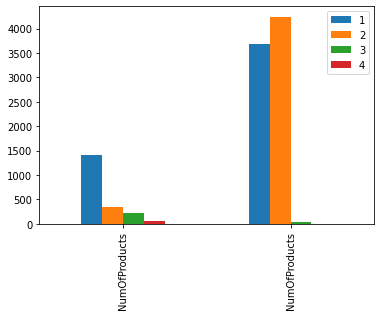

In [12]:
graph('NumOfProducts')

In [13]:
 df.describe()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,1.530200,0.70550,100090.239881,0.203700
std,96.653299,10.487806,62397.405202,0.581654,0.45584,57510.492818,0.402769
min,350.000000,18.000000,0.000000,1.000000,0.00000,11.580000,0.000000
25%,584.000000,32.000000,0.000000,1.000000,0.00000,51002.110000,0.000000
50%,652.000000,37.000000,97198.540000,1.000000,1.00000,100193.915000,0.000000
75%,718.000000,44.000000,127644.240000,2.000000,1.00000,149388.247500,0.000000
max,850.000000,92.000000,250898.090000,4.000000,1.00000,199992.480000,1.000000


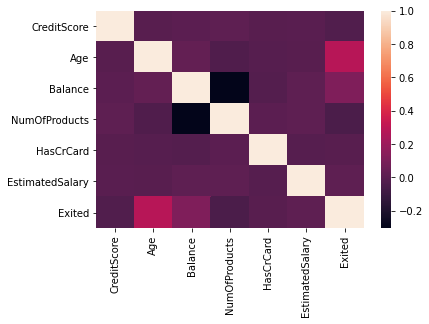

In [14]:
import seaborn as sns
sns.heatmap(df.corr())

In [15]:
df.drop('NumOfProducts',axis = 1, inplace = True)

In [16]:
l5=[]
for i in df['EstimatedSalary']:
  if i >90_000 :
    l5.append('R')
  elif i<90_000 and i>30_000:
    l5.append('M')
  else:
    l5.append('R')     

In [17]:
df.drop(['EstimatedSalary'],axis=1,inplace=True)

In [18]:
df['EstimatedSalary'] = l5

In [19]:
df = df[['CreditScore','Geography','Age','Balance','HasCrCard','EstimatedSalary','Exited']]

In [20]:
df.head()

,CreditScore,Geography,Age,Balance,HasCrCard,EstimatedSalary,Exited
0,619,France,42,0.00,1,R,1
1,608,Spain,41,83807.86,0,R,0
2,502,France,42,159660.80,1,R,1
3,699,France,39,0.00,0,R,0
4,850,Spain,43,125510.82,1,M,0


# Label encoder

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le_G = LabelEncoder()

In [23]:
df['Geography'] = le_G.fit_transform(df['Geography'] )

In [24]:
le_G.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

In [25]:
X_train = df.iloc[:,:5].values # estimated salary not taken
y_train = df.iloc[:,6].values
X_test = df.values

# Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scale_x = StandardScaler()

In [28]:
X_train = scale_x.fit_transform(X_train)

# Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
clf = KNeighborsClassifier()

In [31]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
pred = clf.predict(X_train) 

In [33]:
(pred == y_train).sum()

8514

In [34]:
pred.shape

(10000,)

In [35]:
print(f"The score is : {8514/10000}")

The score is : 0.8514


In [36]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_train,y_train,test_size=0.20)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((8000, 5), (8000,), (2000, 5), (2000,))

In [37]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
clf.score(X_train,y_train)

0.84975

In [41]:
pred = clf.predict(X_test) 

In [42]:
(pred == y_test).sum()

1599

In [43]:
pred.shape

(2000,)

In [44]:
print(f"The test score after validation split is : {1613/2000}")

The test score after validation split is : 0.8065
